### Lead Scoring Case Study: Importing Required Libraries, Suppressing Warnings and Setting Up the Environment

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#supress warnings

import warnings
warnings.filterwarnings("ignore")

#Environment settings

pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
pd.set_option("display.width", None)

### Reading & Extracting the Data

In [2]:
df_leads = pd.read_csv(r'C:\Users\darsh\Desktop\Assignment\Lead Scoring Assignment\Leads.csv')

In [3]:
# Checking the data extracted
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df_leads.shape

(9240, 37)

### Understanding the Data

In [5]:
# Summary of the data
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Unique number of values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
# Checking datatypes of columns
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking for count of missing values 
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking for duplication of rows
df_leads.duplicated().sum()

0

### Data Cleaning

In [10]:
# Extracting list of columns having 'Select' level
cols_with_select_values = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_values)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
# Converting 'Select' values to null.
df_leads = df_leads.replace('Select', np.nan)

In [12]:
# Verifying that no Select level is left
cols_with_select_values = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_values)

[]


In [13]:
# Handling missing value
100*(df_leads.isna().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
# Dropping columns which have more than 40% of null values because that's almost half of the data missing
df_leads = df_leads.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
                         'Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1)

In [15]:
# Checking the percentage of null values for remaining columns
100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [16]:
# Now, let's focus on categorical data in the columns
categorical_colm = df_leads.select_dtypes(include=['category','object']).columns.tolist()
# Printing the selected columns
print(categorical_colm)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [17]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course', 'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

##### By comparing the above results and the csv data file, we can conclude that the following columns can be dropped
##### 1. City: The most missing values are in this column and other data is "Mumbai" which will make the data more skewed
##### 2. Tags: As it is the status of lead and this is not dynamic data; it won't get updated.
##### 3. What matters most to you in choosing a course: The data in this column is "better career prospects" so it doesn't makes sense to feed this in the model
##### 4. Country: Because majority of the customers are from India and the courses are online so it doesn't matters

In [18]:
df_leads.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [19]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
# Now that we have dropped the unnecessary columns, we will start imputing the columns
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened','What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [21]:
# Re-checking the percentage of null values
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

##### So, we have successfully reduced the null value percentage. Now, we will focus on numerical data

In [22]:
df_leads.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [23]:
# Imputing missing values in column - TotalVisits with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace = True)

In [24]:
# Page Visits per View
df_leads['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: count, dtype: int64

In [25]:
# Imputing missing values in column - Page Visits per View with mode
df_leads["Page Views Per Visit"].fillna(df_leads["Page Views Per Visit"].mode()[0], inplace = True)

In [26]:
# Re-checking null values
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

##### Successfully removed null values by dropping and imputation. Now, we will focus on removing unwanted columns

In [27]:
# Last Notable Activity Column
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

In [28]:
# Checking for columns with one unique value, count and frequency is same
df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


##### The columns which have 1 unique values are as follows:
##### 1. Magazine
##### 2. Receive More Updates About Our Courses
##### 3. Update me on Supply Chain Content
##### 4. Get updates on DM Content
##### 5. I agree to pay the amount through cheque
##### Hence, these columns can be dropped

In [29]:
colms_to_drop = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df_leads.drop(colms_to_drop, axis = 1, inplace = True)

#### Let's analyse the columns and corresponding data again which won't be of much use

##### The below columns can be dropped which are of no use for modelling data
##### Prospect ID: A unique ID with which the customer is identified which will keep changing
##### Lead Number: A lead number assigned to each lead procured again which is unique and will keep changing
##### Last Notable Activity: The last notable acitivity performed by the student can be ignored as it is not dynamic data and won't get updated.

In [30]:
# Dropping above columns
colms_to_drop = [ 'Prospect ID','Lead Number','Last Notable Activity' ]
df_leads.drop(colms_to_drop, axis = 1, inplace = True)

In [31]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

##### No missing values found

##### Let's check the data for skewness for handling unique values in numeric columns

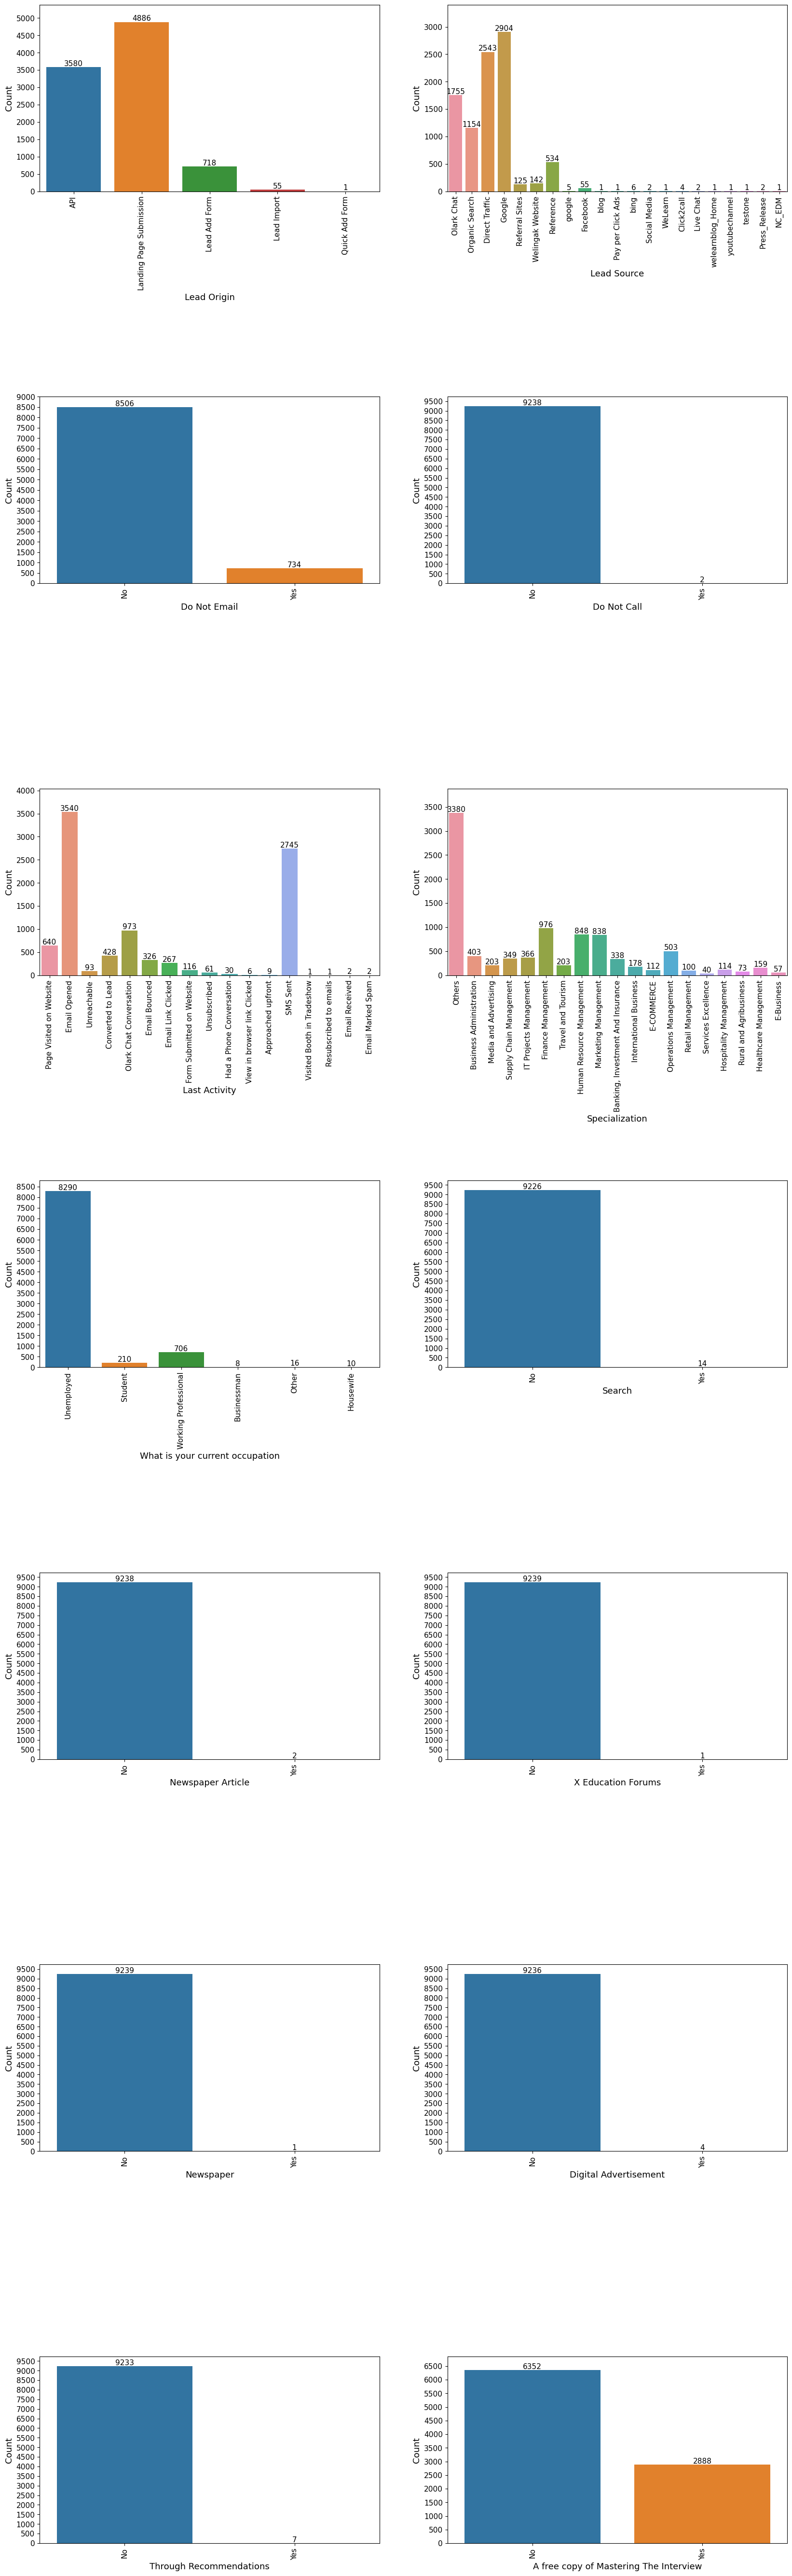

In [32]:
# plotting countplot for object dtype and histogram for number to get data distribution

categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20, 100))
plt.subplots_adjust(wspace=.2, hspace=1.1)

for i, col in enumerate(categorical_col):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(x=col, data=df_leads, orient='v')
    plt.xticks(rotation=90, fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Count', fontsize=13)
    
    max_height = 0
    for p in ax.patches:
        if p.get_height() > max_height:
            max_height = p.get_height()
        
        ax.annotate('{:.0f}'.format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=11)
        
    ax.set_ylim([0, max_height + 500])
    ax.set_yticks(np.arange(0, max_height + 500, 500))

plt.show()

#### Following columns have data which is highly skewed
1. Do Not Call
2. Search
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement
7. Through Recommendations 

##### So we will be dropping these columns.

In [33]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [35]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [36]:
#For standardising values, now let's focus on the outliers
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])   
        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

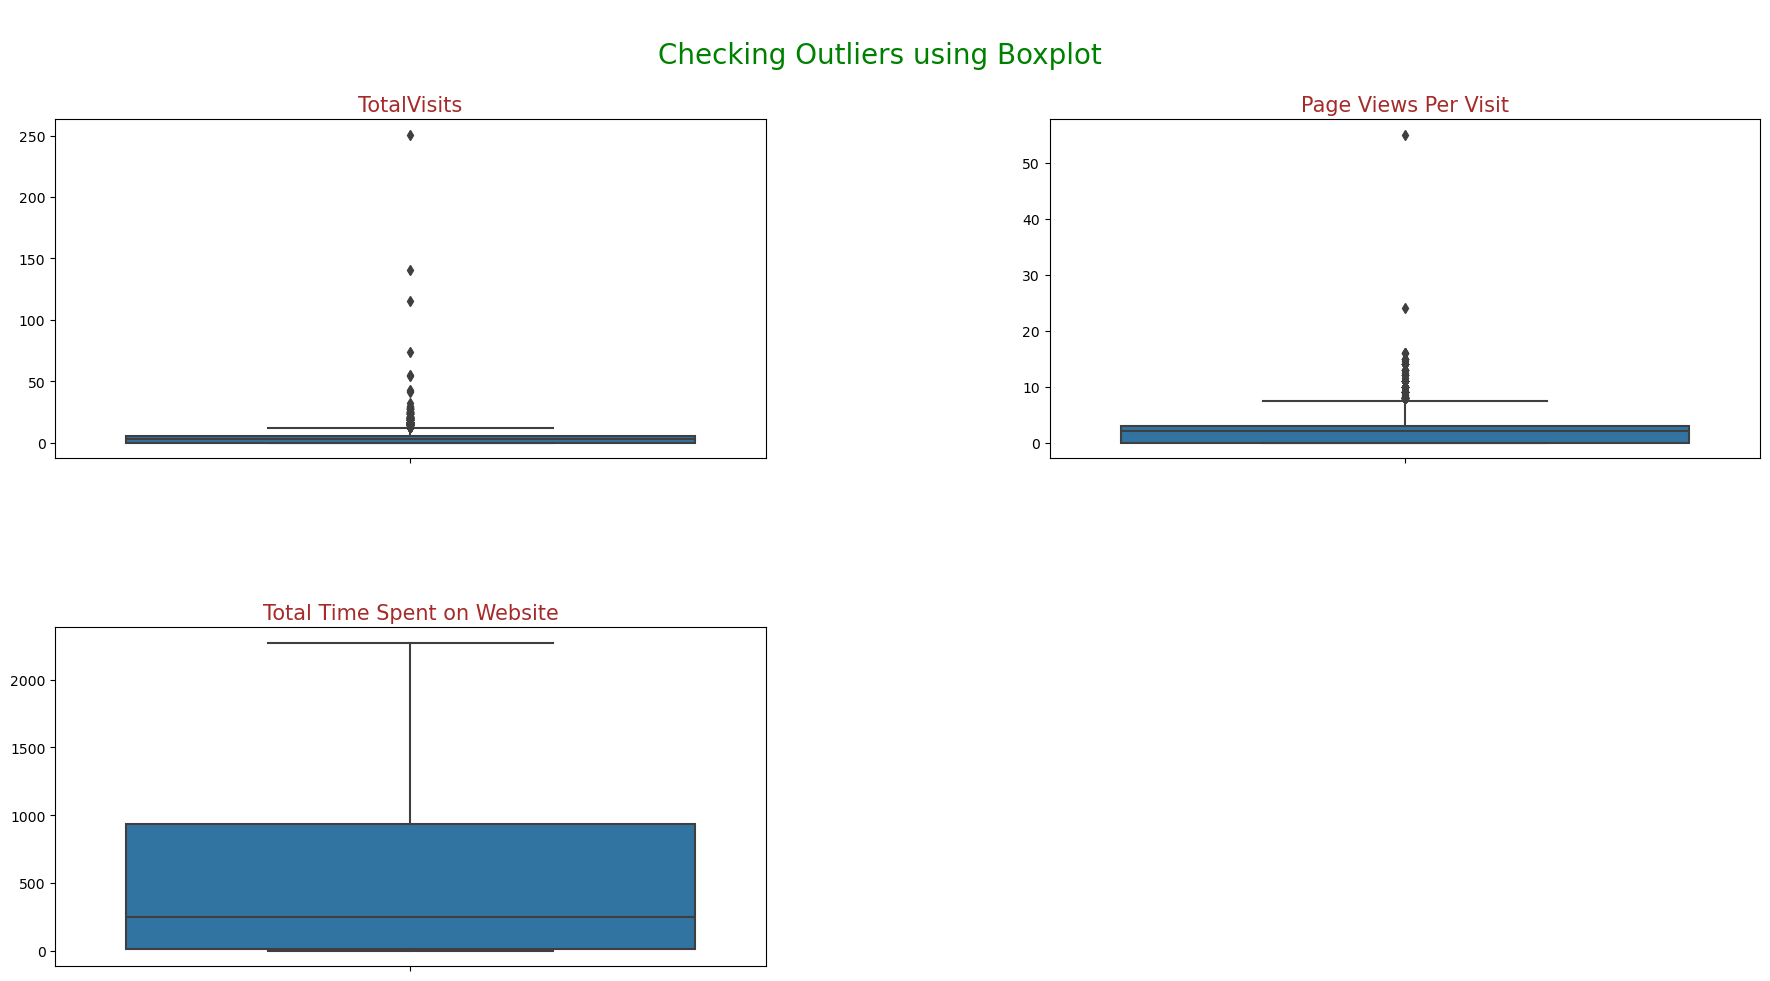

In [37]:
# Checking outliers for numerical columns
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"] 
Check_Outliers(df_leads,num_cols)

##### "TotalVisits","Page Views Per Visit" have outliers

In [38]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [39]:
# Treating outliers
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [40]:
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df_leads,capping_cols)

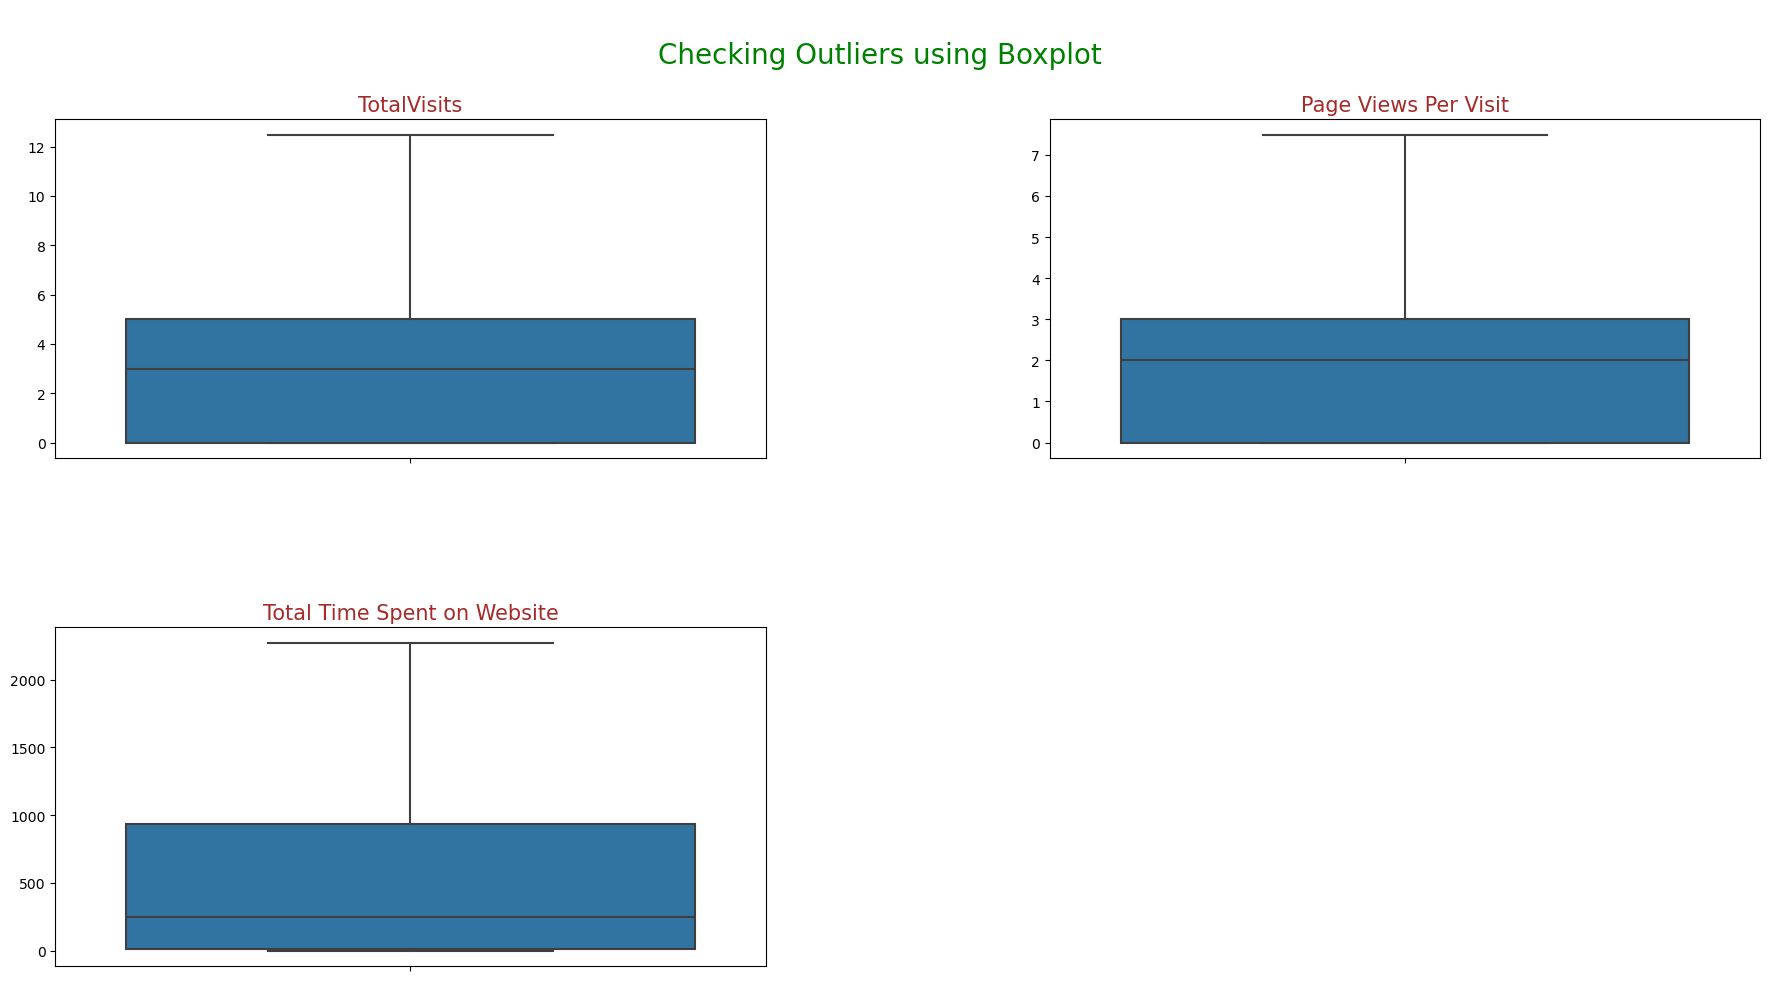

In [41]:
# Verifying non-existence of outliers
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

In [42]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


In [43]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [44]:
# Let's go through the categorical variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

In [45]:
# Grouping low frequency value levels to Others because they have few records
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google because they are the same and don't require 2 entries
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [46]:
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [47]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [48]:
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [49]:
# Renaming "Free_copy" from "A free copy of Mastering The Interview" for a shorter column name
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming "Current_occupation" from "What is your current occupation" for a shorter column name"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [50]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [51]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


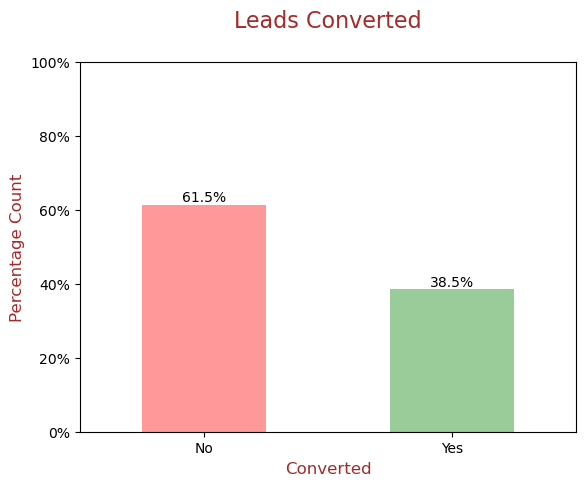

In [52]:
# ploting the results on bar plot
ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Brown'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')  
plt.show()

##### Conversion rate is of 38.5% which less leads converted

In [53]:
# Checking data Imbalance
ratio = (df_leads['Converted'].value_counts(normalize = True).loc[0])/(df_leads['Converted'].value_counts(normalize = True).loc[1])
print("Data Imbalance Ratio: {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio: 1.59 : 1


In [54]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [55]:
# Let's start with univariate analysis for list of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

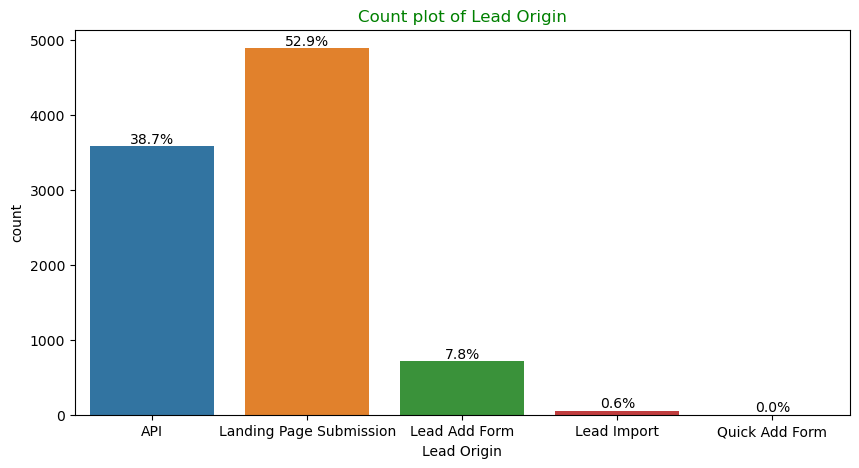

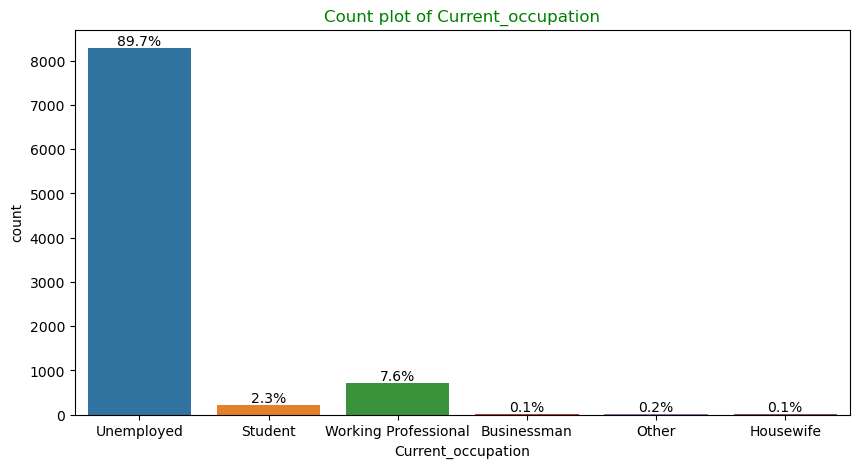

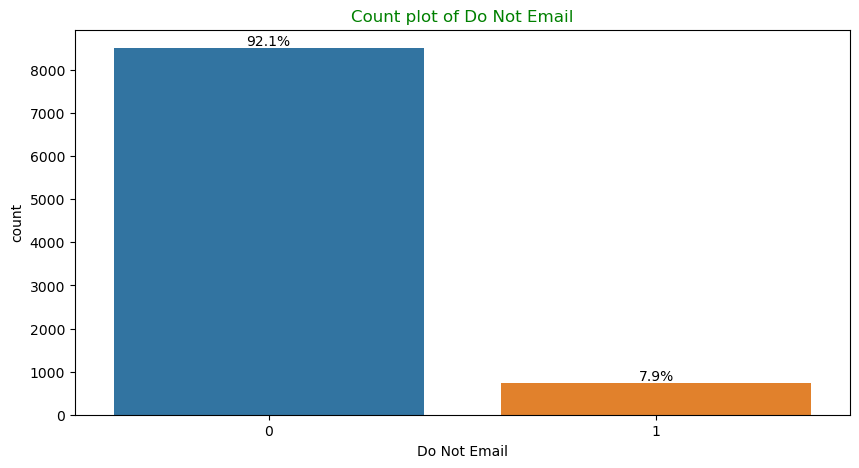

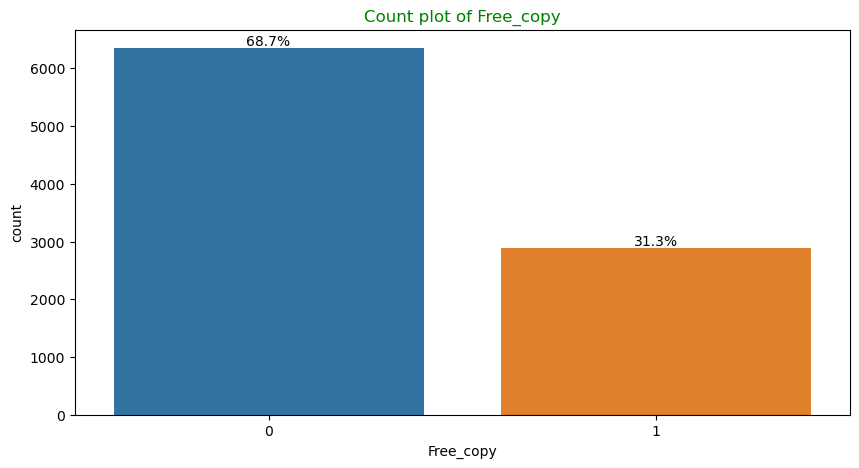

In [56]:
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

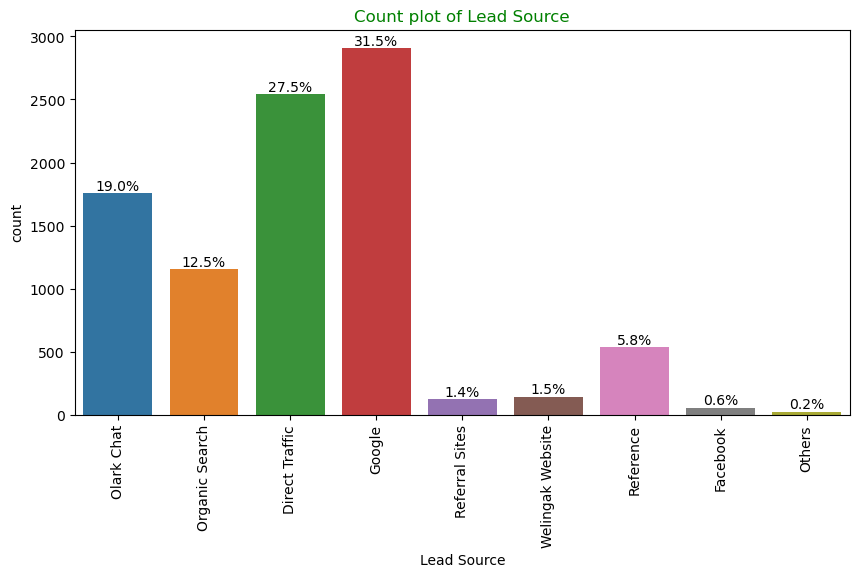

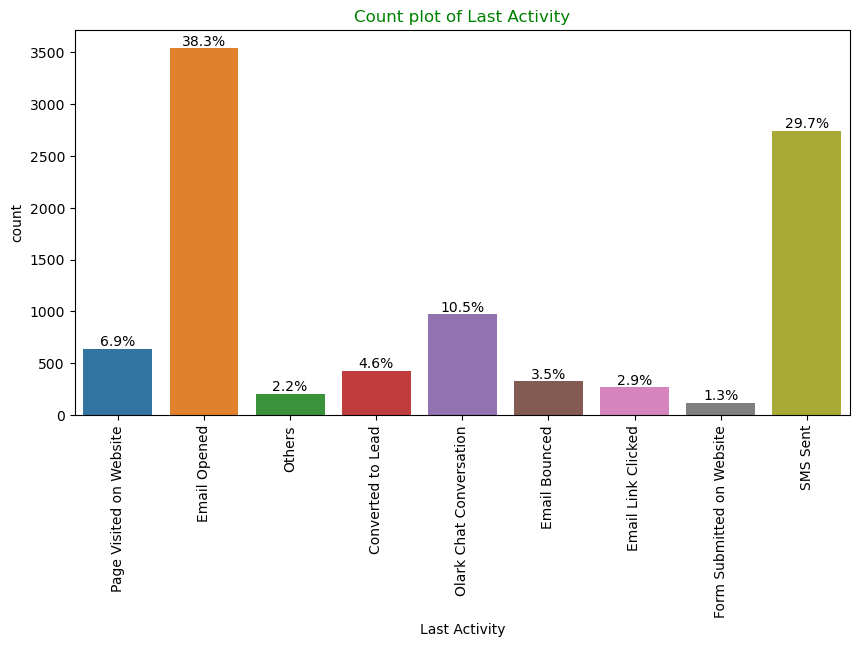

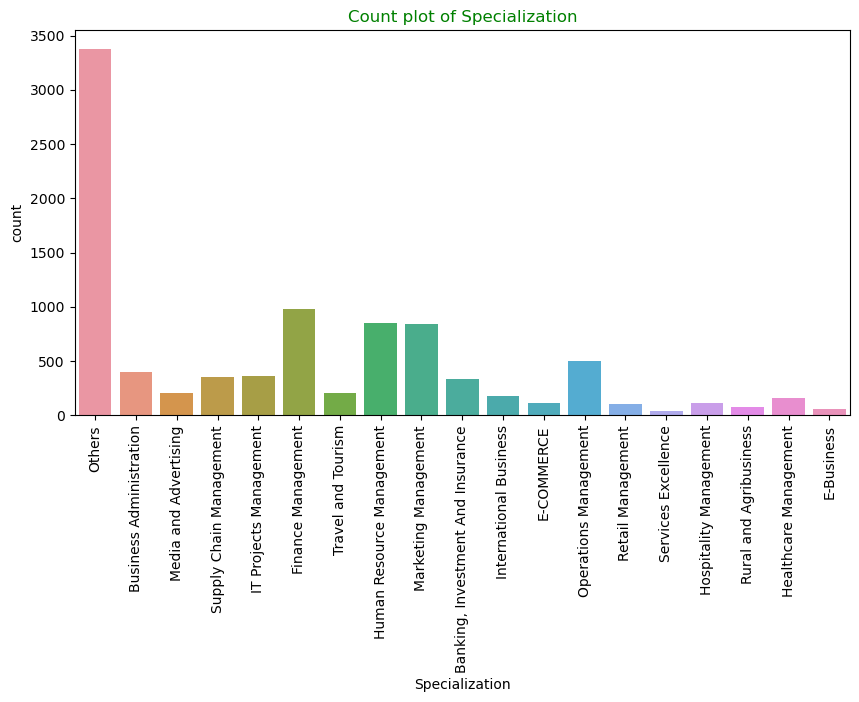

In [57]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

##### Here is the list of features from variables which are present in majority (Converted and Not Converted included)
##### 1. Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%. 
##### 2. Current_occupation: 90% of the customers as Unemployed
##### 3. Do Not Email: 92% of the people has opted for not getting the email
##### 4. Lead Source: 58% Lead source is from Google & Direct Traffic
##### 5. Last Activity: 68% of customers contribution in SMS Sent & Email Opened Activity

In [58]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

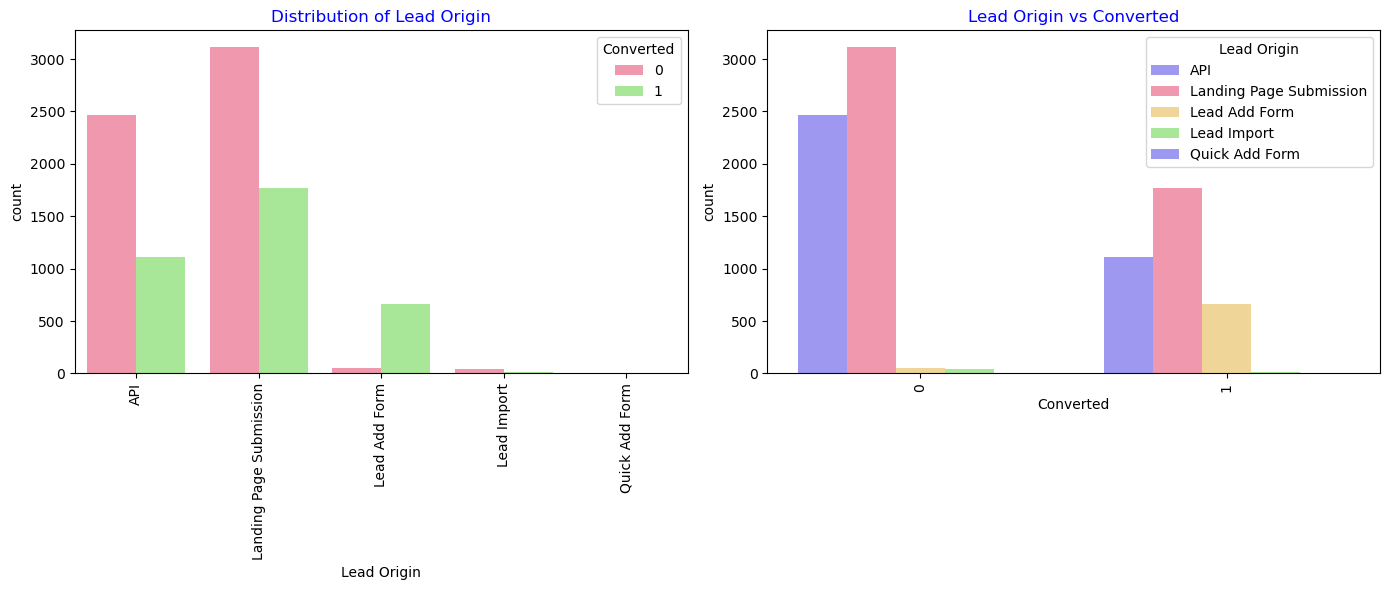

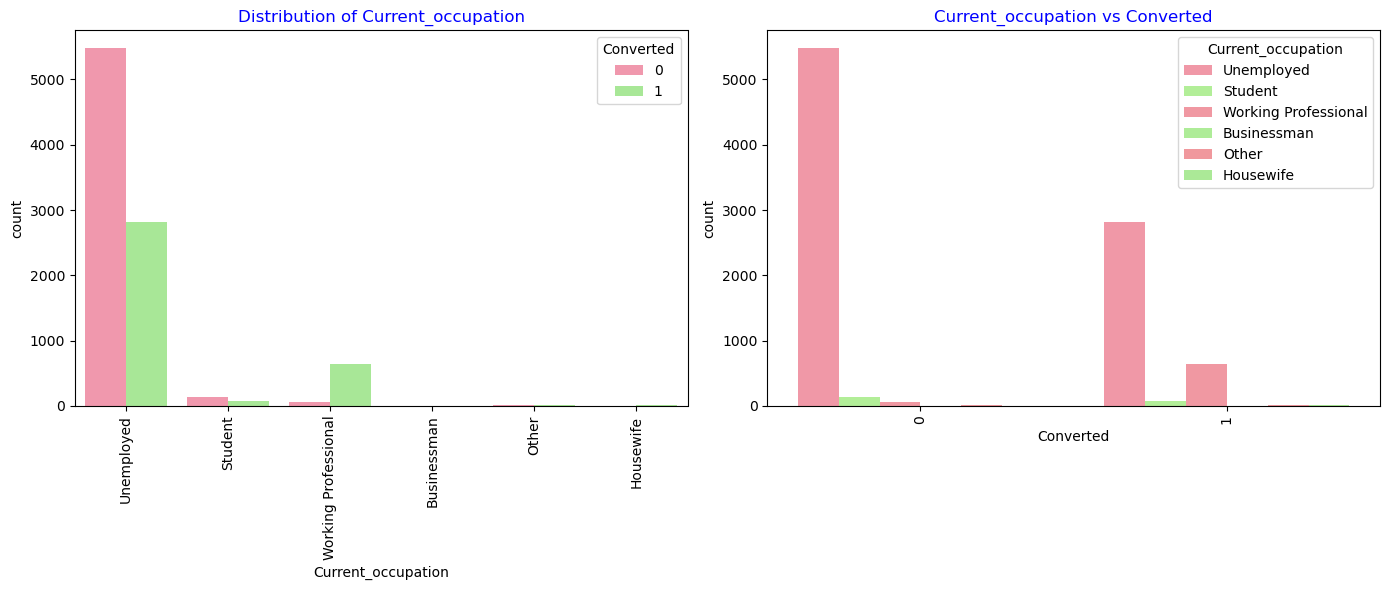

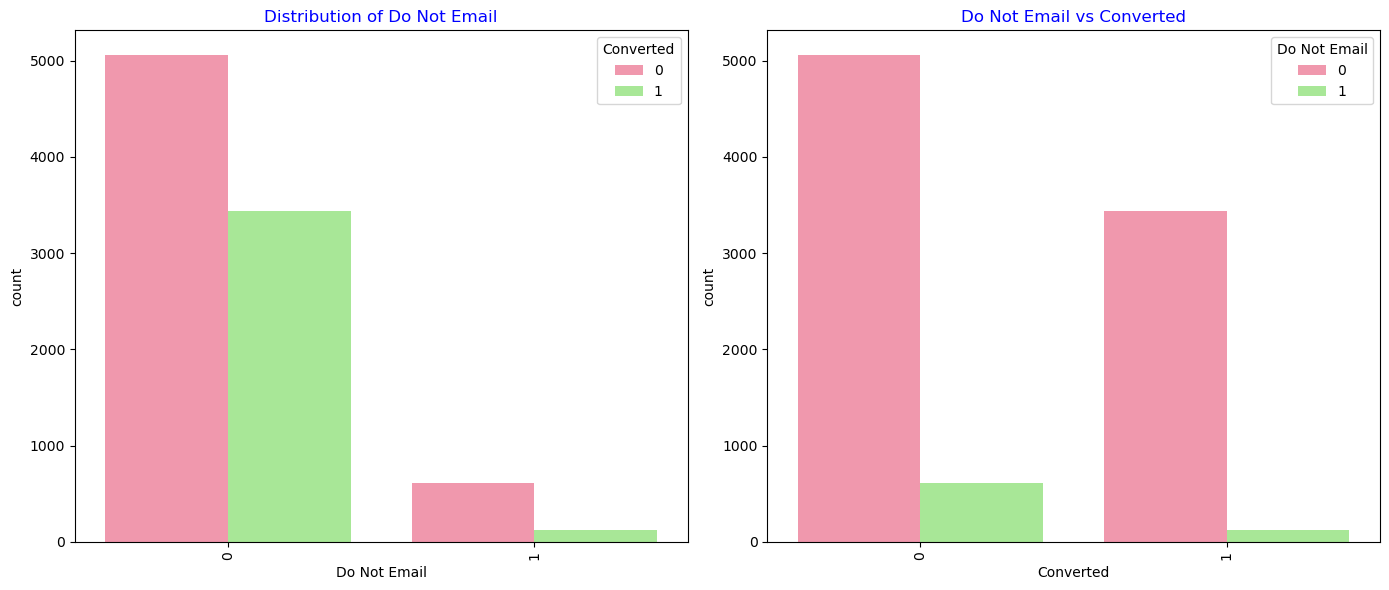

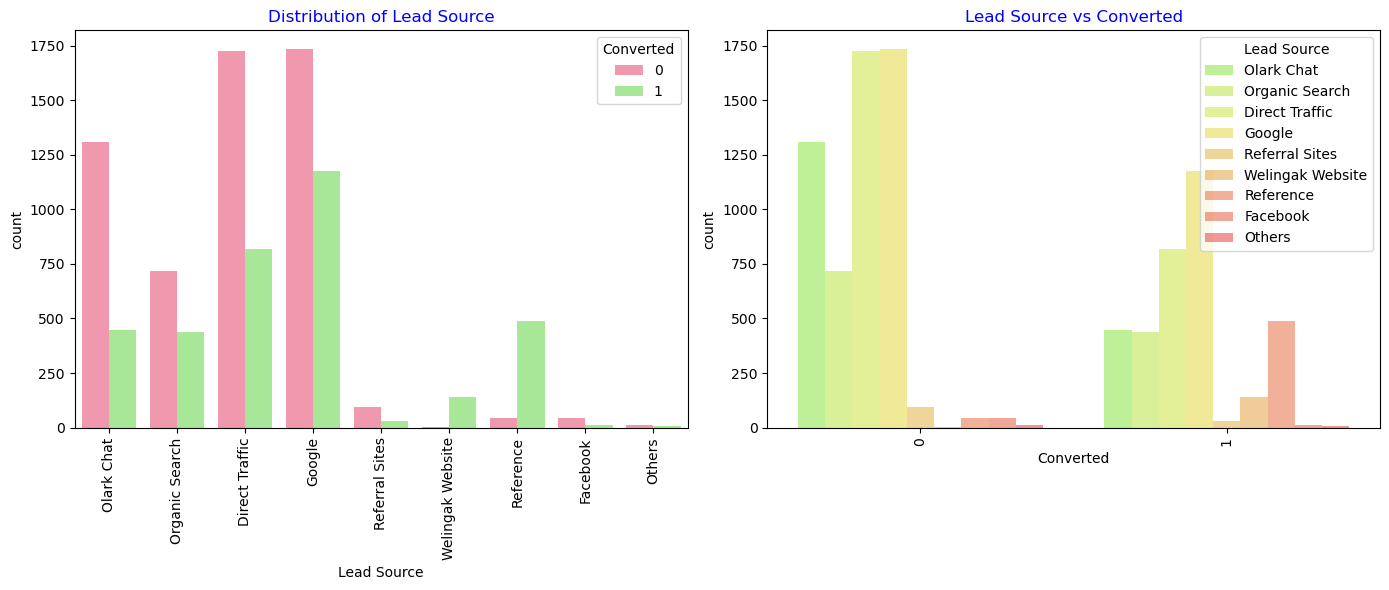

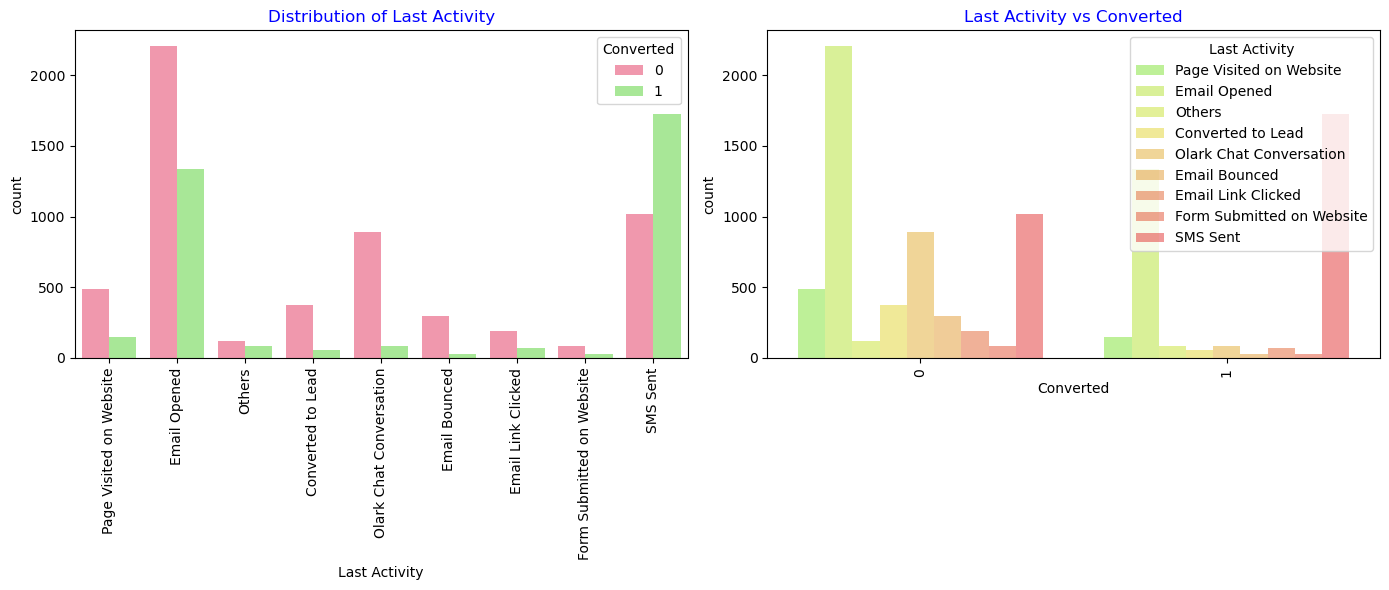

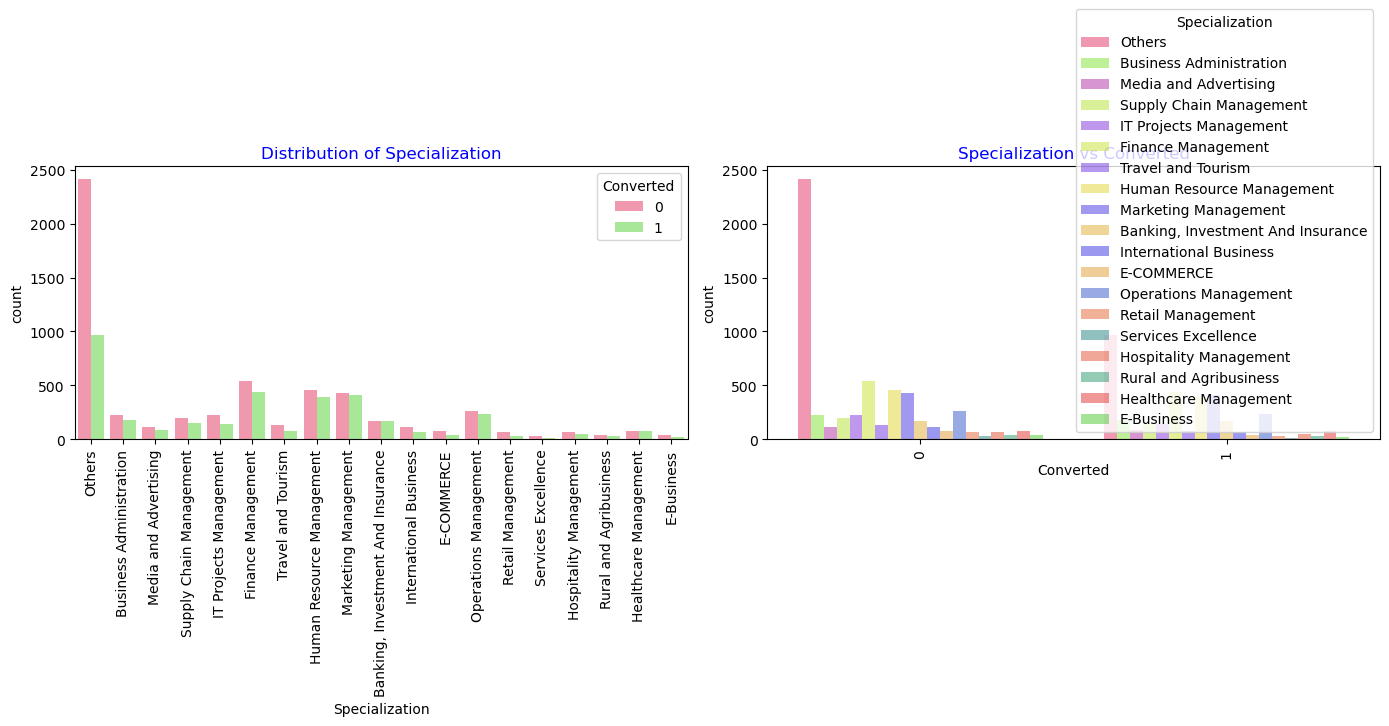

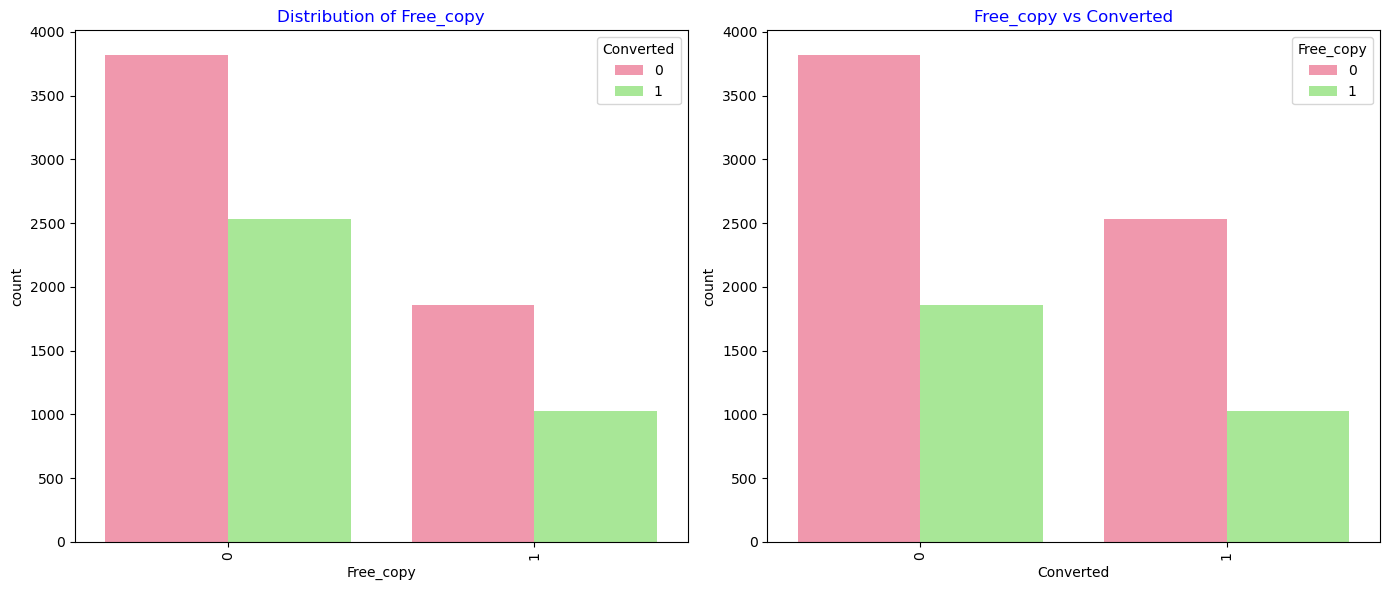

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def Bivariate_cat(df, variable_name, target="Converted"):
    # Ensure both the target variable and the variable_name are treated as strings
    df[variable_name] = df[variable_name].astype(str)
    df[target] = df[target].astype(str)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.title(f"Distribution of {variable_name}", color="blue")
    sns.countplot(x=variable_name, hue=target, data=df, palette="prism_r", alpha=0.46)
    plt.xticks(rotation=90)

    plt.subplot(1, 2, 2)
    plt.title(f"{variable_name} vs {target}", color="blue")
    sns.countplot(x=target, hue=variable_name, data=df, palette="prism_r", alpha=0.46)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

cat_cols = ["Lead Origin", "Current_occupation", "Do Not Email", "Lead Source", "Last Activity", "Specialization", "Free_copy"]

# Looping through each categorical column and plot
for col in cat_cols:
    Bivariate_cat(df_leads, variable_name=col)

<Figure size 1600x400 with 0 Axes>

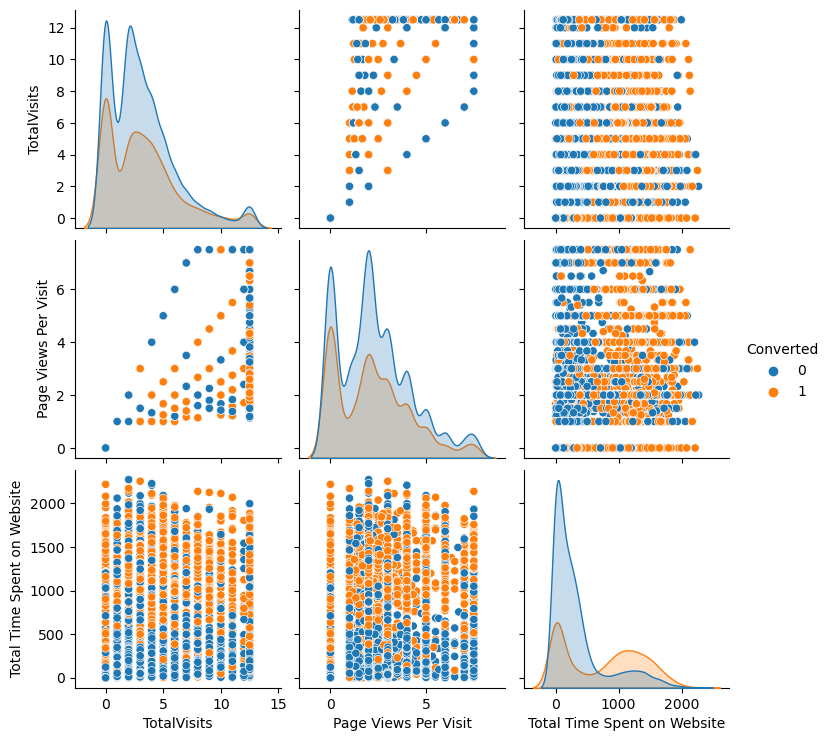

In [60]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [61]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

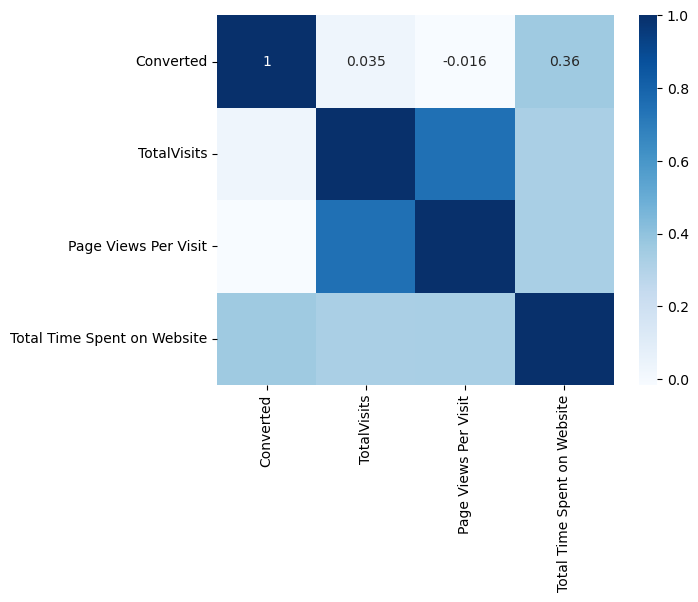

In [62]:
# Heatmap to show correlation
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

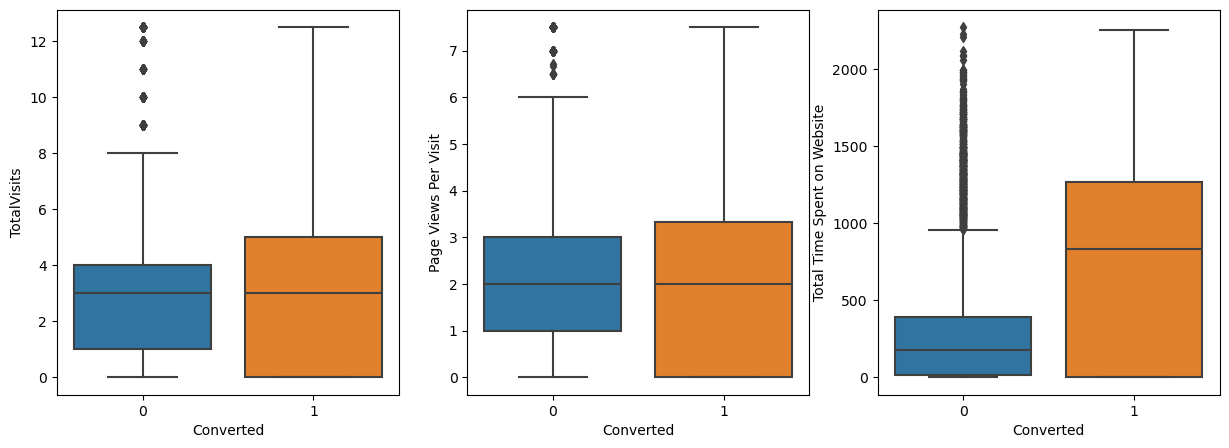

In [63]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

##### Past Leads who spends more time on Website are successfully converted

In [64]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [65]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [66]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [67]:
# We have created dummies for the below variables, so we can drop them
df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],axis = 1)

In [68]:
df_leads.shape

(9240, 49)

In [69]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   object 
 1   Converted                                 9240 non-null   object 
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   object 
 6   Lead Origin_Landing Page Submission       9240 non-null   bool   
 7   Lead Origin_Lead Add Form                 9240 non-null   bool   
 8   Lead Origin_Lead Import                   9240 non-null   bool   
 9   Lead Origin_Quick Add Form                9240 non-null   bool   
 10  Lead Source_Facebook                

In [70]:
# Preparing for test and train split by putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [73]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


In [74]:
# Feature scaling using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [75]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0,-1.064974,-0.885371,-1.184892,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
6795,0,0.262370,0.005716,-0.488713,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3516,0,0.594206,-0.691418,0.123715,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8105,0,0.594206,1.365219,1.432322,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3934,0,-1.064974,-0.885371,-1.184892,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [76]:
# Ensure the 'Converted' column is numeric
df_leads['Converted'] = df_leads['Converted'].astype(int)

# Calculate the Lead Conversion Rate (LCR)
LCR = (df_leads['Converted'].sum() / len(df_leads)) * 100
LCR

38.53896103896104

##### 38.5% is the Conversion Rate

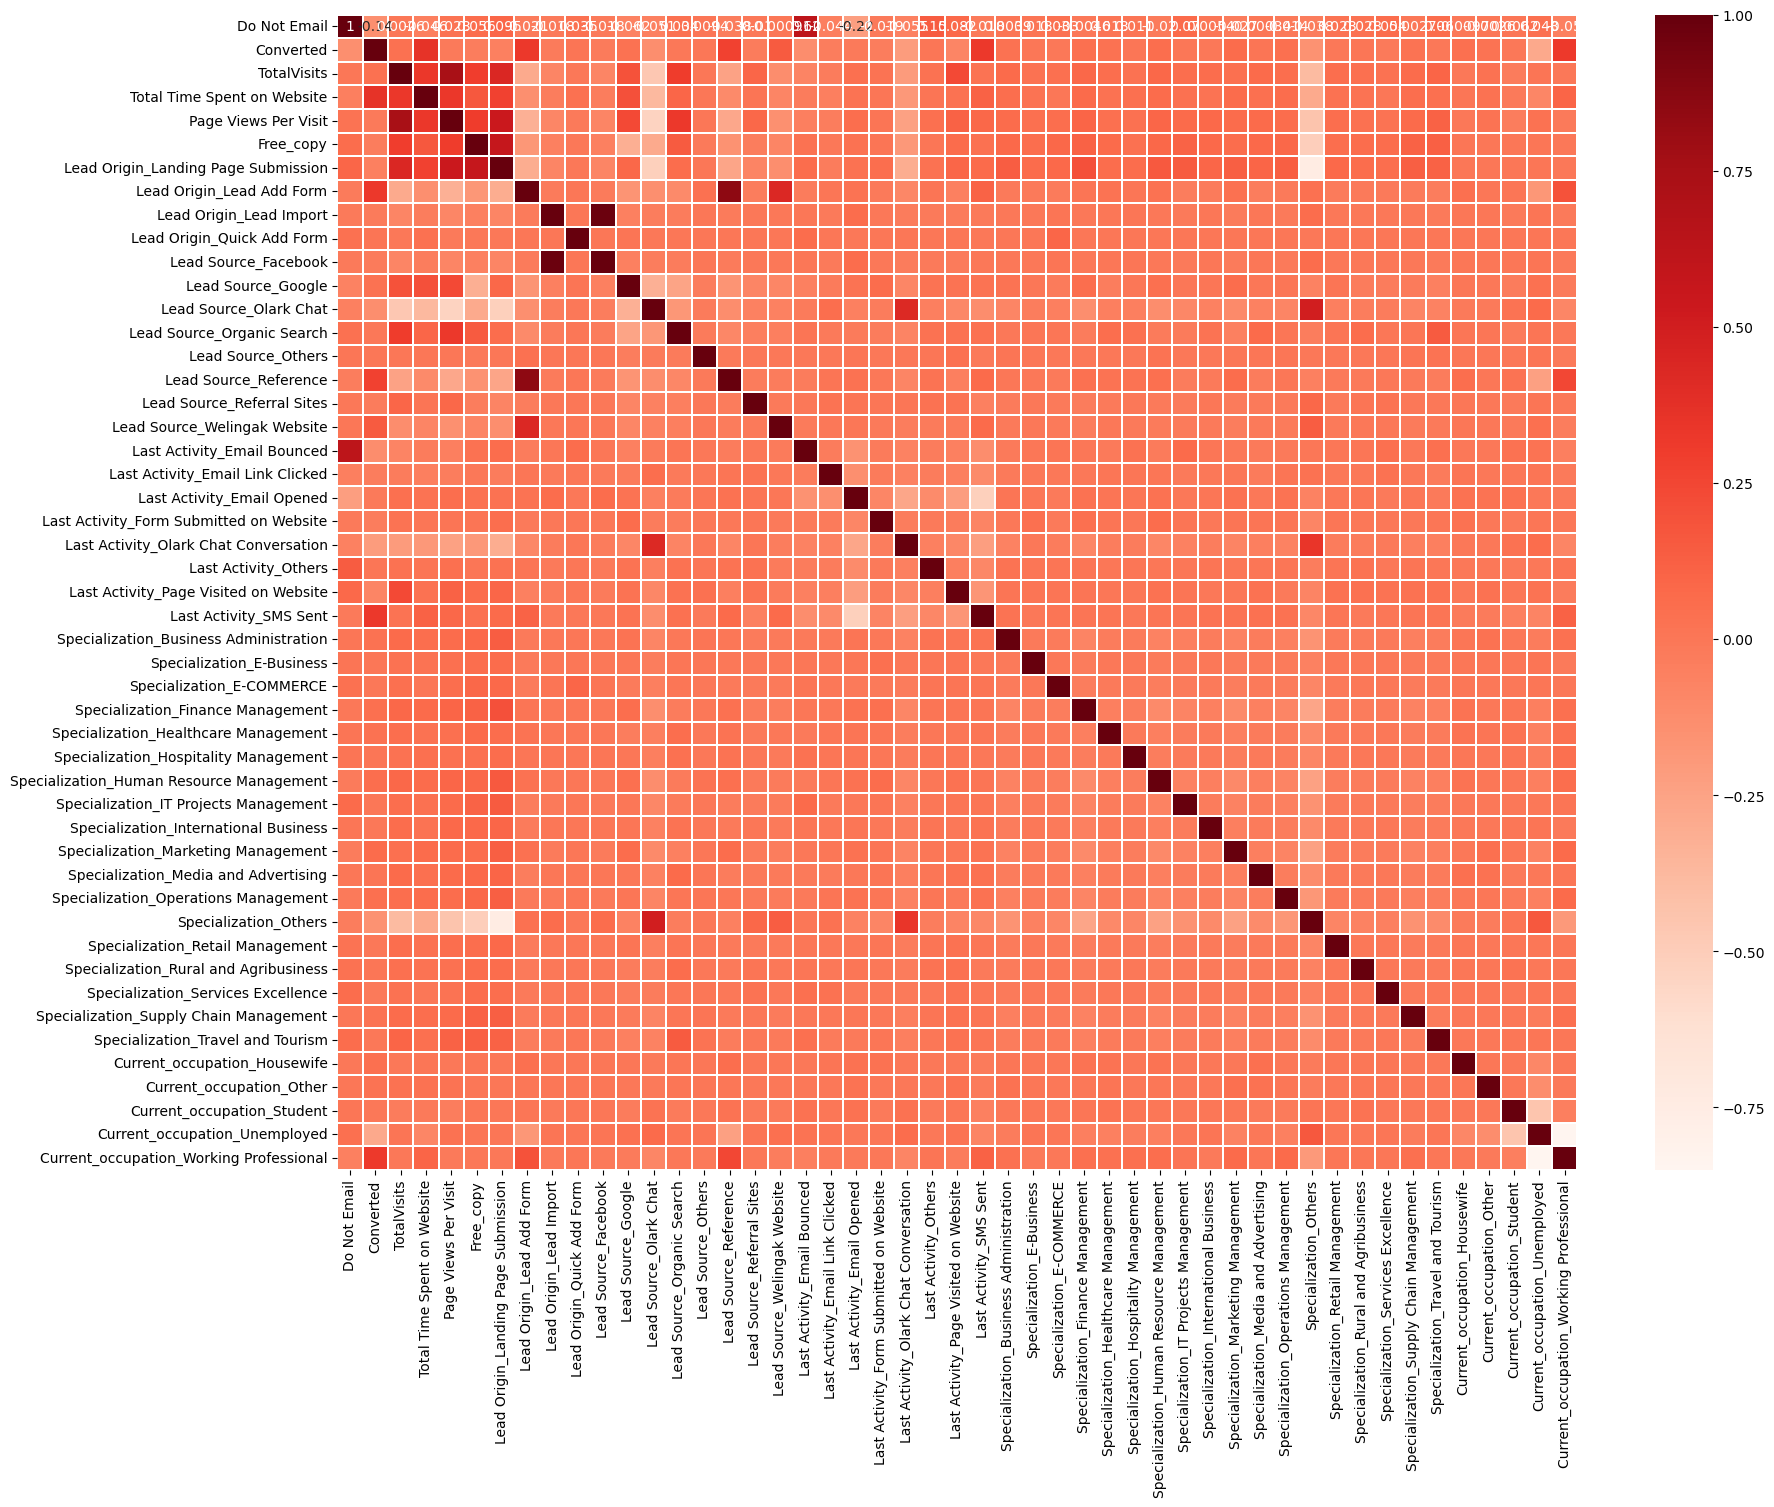

In [77]:
# Correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

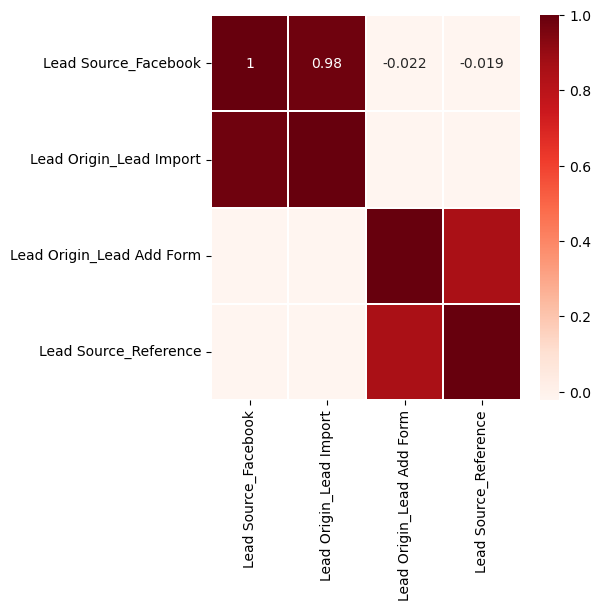

In [78]:
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

##### Dropping 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' because of high corrrelation as we cans ee in the above heatmap

In [79]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis = 1)
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis = 1)

In [80]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [81]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Free_copy', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [82]:
# Top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [83]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [84]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Exce

In [85]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Building Model 1

In [86]:
# Select the columns chosen by RFE for training and testing sets
X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]

In [87]:
print(X_train_rfe.dtypes)
print(X_train_rfe.isnull().sum())
print(y_train.isnull().sum())

Do Not Email                                object
Total Time Spent on Website                float64
Lead Origin_Landing Page Submission           bool
Lead Source_Olark Chat                        bool
Lead Source_Others                            bool
Lead Source_Reference                         bool
Lead Source_Welingak Website                  bool
Last Activity_Email Opened                    bool
Last Activity_Olark Chat Conversation         bool
Last Activity_Others                          bool
Last Activity_SMS Sent                        bool
Specialization_Hospitality Management         bool
Specialization_Others                         bool
Current_occupation_Housewife                  bool
Current_occupation_Working Professional       bool
dtype: object
Do Not Email                               0
Total Time Spent on Website                0
Lead Origin_Landing Page Submission        0
Lead Source_Olark Chat                     0
Lead Source_Others                       

In [88]:
# Convert all columns to numeric if not already
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
X_test_rfe = X_test_rfe.apply(pd.to_numeric, errors='coerce')

In [89]:
print(X_train_rfe.isnull().sum())

Do Not Email                               0
Total Time Spent on Website                0
Lead Origin_Landing Page Submission        0
Lead Source_Olark Chat                     0
Lead Source_Others                         0
Lead Source_Reference                      0
Lead Source_Welingak Website               0
Last Activity_Email Opened                 0
Last Activity_Olark Chat Conversation      0
Last Activity_Others                       0
Last Activity_SMS Sent                     0
Specialization_Hospitality Management      0
Specialization_Others                      0
Current_occupation_Housewife               0
Current_occupation_Working Professional    0
dtype: int64


In [103]:
# Ensure Y_train is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Check for and handle any NaN values that may have been introduced
y_train = y_train.dropna()
X_train_rfe = X_train_rfe.loc[y_train.index]

# Ensure X_train_rfe is numeric
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')

# Check for and handle any NaN values in X_train_rfe
X_train_rfe = X_train_rfe.dropna()
y_train = y_train.loc[X_train_rfe.index]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create and fit the model
logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# Print the model parameters
print(logm1.params)

const                                      -0.880549
Do Not Email                               -1.113161
Total Time Spent on Website                 1.047459
Lead Origin_Landing Page Submission        -1.219755
Lead Source_Olark Chat                      0.928497
Lead Source_Others                          1.084735
Lead Source_Reference                       2.944603
Lead Source_Welingak Website                5.486416
Last Activity_Email Opened                  0.754611
Last Activity_Olark Chat Conversation      -0.717197
Last Activity_Others                        1.415596
Last Activity_SMS Sent                      1.941901
Specialization_Hospitality Management      -1.060641
Specialization_Others                      -1.180957
Current_occupation_Housewife               22.967317
Current_occupation_Working Professional     2.646569
dtype: float64


In [104]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Sat, 15 Jun 2024   Deviance:                       5418.7
Time:                        11:05:08   Pearson chi2:                 8.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [105]:
#Because of highest correlation
rfe_col=rfe_col.drop("Current_occupation_Housewife")

### Building Model 2

In [106]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Convert boolean columns to integers
X_train_rfe = X_train_rfe.astype(int)
print(X_train_rfe.dtypes)

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

Do Not Email                               int32
Total Time Spent on Website                int32
Lead Origin_Landing Page Submission        int32
Lead Source_Olark Chat                     int32
Lead Source_Others                         int32
Lead Source_Reference                      int32
Lead Source_Welingak Website               int32
Last Activity_Email Opened                 int32
Last Activity_Olark Chat Conversation      int32
Last Activity_Others                       int32
Last Activity_SMS Sent                     int32
Specialization_Hospitality Management      int32
Specialization_Others                      int32
Current_occupation_Working Professional    int32
dtype: object


In [107]:
# Create and fit the model
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()  

# Print the model parameters
print(logm2.params)

const                                     -0.879891
Do Not Email                              -1.152257
Total Time Spent on Website                1.313461
Lead Origin_Landing Page Submission       -1.292983
Lead Source_Olark Chat                     0.226466
Lead Source_Others                         0.985524
Lead Source_Reference                      2.289717
Lead Source_Welingak Website               4.826303
Last Activity_Email Opened                 0.732709
Last Activity_Olark Chat Conversation     -0.725088
Last Activity_Others                       1.322803
Last Activity_SMS Sent                     1.905573
Specialization_Hospitality Management     -1.027061
Specialization_Others                     -1.321526
Current_occupation_Working Professional    2.728765
dtype: float64


In [108]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.2
Date:                Sat, 15 Jun 2024   Deviance:                       5806.4
Time:                        11:05:17   Pearson chi2:                 7.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3506
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [109]:
# Because of high correlation
rfe_col=rfe_col.drop("Lead Source_Others")

### Building Model 3

In [110]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Convert boolean columns to integers
X_train_rfe = X_train_rfe.astype(int)

# Drop non-numeric columns
X_train_rfe = X_train_rfe.select_dtypes(include=['int', 'float'])

# Ensure there are no missing values introduced during conversion
X_train_rfe = X_train_rfe.fillna(0)

# Check the data types to confirm all are numeric
print(X_train_rfe.dtypes)

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create and fit the model
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

# Print the model parameters
print(logm3.params)

Do Not Email                               int32
Total Time Spent on Website                int32
Lead Origin_Landing Page Submission        int32
Lead Source_Olark Chat                     int32
Lead Source_Reference                      int32
Lead Source_Welingak Website               int32
Last Activity_Email Opened                 int32
Last Activity_Olark Chat Conversation      int32
Last Activity_Others                       int32
Last Activity_SMS Sent                     int32
Specialization_Hospitality Management      int32
Specialization_Others                      int32
Current_occupation_Working Professional    int32
dtype: object
const                                     -0.864935
Do Not Email                              -1.146923
Total Time Spent on Website                1.310014
Lead Origin_Landing Page Submission       -1.301814
Lead Source_Olark Chat                     0.218343
Lead Source_Reference                      2.279893
Lead Source_Welingak Website         

In [111]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.0
Date:                Sat, 15 Jun 2024   Deviance:                       5809.9
Time:                        11:05:24   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3502
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

##### Model 3 is stable and has significant p-values within the threshold (p-values < 0.05)

In [112]:
# Now checking VIFs for all variables
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.83
1,Specialization_Others,2.58
2,Last Activity_Email Opened,2.55
3,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.00
5,Last Activity_Olark Chat Conversation,1.76
6,Total Time Spent on Website,1.30
7,Lead Source_Reference,1.28
8,Do Not Email,1.20
9,Current_occupation_Working Professional,1.20


##### No variable needs to be dropped as they all have good VIF values less than 5.

#### Model Evaluation 

In [113]:
# Getting the predicted values on the train set
y_train_pred = logm3.predict(X_train_sm3)
y_train_pred[:10]

1871    0.521458
6795    0.059337
3516    0.223881
8105    0.740036
3934    0.223881
4844    0.977460
3297    0.192434
8071    0.995772
987     0.100290
7423    0.734757
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52145788, 0.05933714, 0.22388071, 0.74003574, 0.22388071,
       0.97746021, 0.19243388, 0.9957716 , 0.10028952, 0.73475654])

In [115]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.521458,1871
1,0,0.059337,6795
2,0,0.223881,3516
3,0,0.740036,8105
4,0,0.223881,3934


In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.521458,1871,1
1,0,0.059337,6795,0
2,0,0.223881,3516,0
3,0,0.740036,8105,1
4,0,0.223881,3934,0


In [117]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3730  272]
 [1105 1361]]


In [118]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.7871057513914657


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.5519059205190592


In [121]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.9320339830084957


In [122]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.06796601699150424


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.833435394978567


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7714581178903827


In [125]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

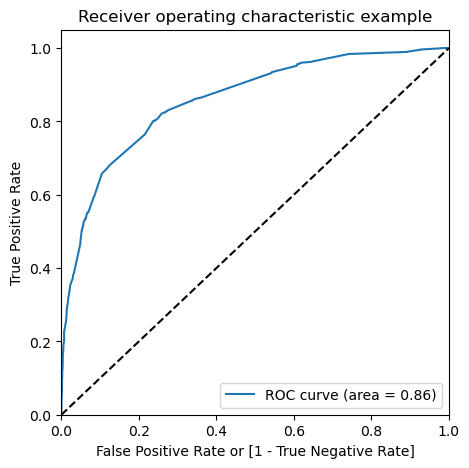

In [128]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

##### Area under ROC curve is 0.86 out of 1 which indicates a good predictive model

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.521458,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.059337,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.223881,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.740036,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.223881,3934,0,1,1,1,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.510204  0.985401  0.217391
0.2   0.2  0.734075  0.861314  0.655672
0.3   0.3  0.773036  0.806569  0.752374
0.4   0.4  0.777829  0.800487  0.763868
0.5   0.5  0.787106  0.551906  0.932034
0.6   0.6  0.784014  0.533252  0.938531
0.7   0.7  0.777829  0.503244  0.947026
0.8   0.8  0.730983  0.324818  0.981259
0.9   0.9  0.709029  0.257097  0.987506


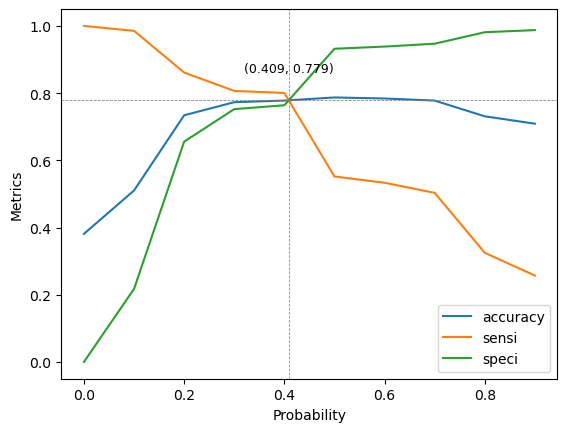

In [131]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')

# Define a function to find the intersection
def find_intersection(func1, func2, x0_range):
    intersection = float('nan')
    for x0 in x0_range:
        try:
            intersection = float(fsolve(lambda x: func1(x) - func2(x), x0))
            break
        except ValueError:
            pass
    return intersection

# Calculate the intersection within the range [0, 1]
intersection_1 = find_intersection(sensi_interp, acc_interp, np.linspace(0.01, 0.99, 10))

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = find_intersection(speci_interp, acc_interp, np.linspace(0.01, 0.99, 10))

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = acc_interp(intersection_x)
sensitivity_at_intersection = sensi_interp(intersection_x)
specificity_at_intersection = speci_interp(intersection_x)

# Plot the three curves
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.xlabel('Probability')
plt.ylabel('Metrics')

# Add vertical and horizontal lines at intersection point
plt.axvline(x=intersection_x, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey', linewidth=0.55, linestyle='--')

# Annotate intersection point
plt.annotate(f'({intersection_x:.3f}, {accuracy_at_intersection:.3f})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

plt.show()

#### 0.409 seems to be our 'Optimal cutoff point for probability threshold .

In [132]:
# Add the final predicted column
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.409 else 0)

# Check the existing columns in the DataFrame
print("Existing columns in y_train_pred_final:")
print(y_train_pred_final.columns)

# In this case, it looks like we might need to drop the columns containing probabilities and a column named 'Predicted'
columns_to_drop = ["Predicted"]

# Ensure the columns exist before attempting to drop
columns_to_drop = [col for col in columns_to_drop if col in y_train_pred_final.columns]

# Drop the unwanted columns
if columns_to_drop:
    y_train_pred_final.drop(columns_to_drop, axis=1, inplace=True)
else:
    print("No columns to drop")

# Display the head of the DataFrame to verify changes
y_train_pred_final.head()

Existing columns in y_train_pred_final:
Index([      'Converted',  'Converted_Prob',     'Prospect ID',
             'Predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9, 'final_predicted'],
      dtype='object')


,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.521458,1871,1,1,1,1,1,1,0,0,0,0,1
1,0,0.059337,6795,1,0,0,0,0,0,0,0,0,0,0
2,0,0.223881,3516,1,1,1,0,0,0,0,0,0,0,0
3,0,0.740036,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.223881,3934,1,1,1,0,0,0,0,0,0,0,0


In [133]:
# Add the final predicted column
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.409 else 0)

# Check the existing columns in the DataFrame
print("Existing columns in y_train_pred_final:")
print(y_train_pred_final.columns)

# Check if 'Predicted' column exists before attempting to drop it
if 'Predicted' in y_train_pred_final.columns:
    y_train_pred_final.drop(['Predicted'], axis=1, inplace=True)
    print("'Predicted' column dropped successfully")
else:
    print("Column 'Predicted' not found")

# Display the head of the DataFrame to verify changes
y_train_pred_final.head()

Existing columns in y_train_pred_final:
Index([      'Converted',  'Converted_Prob',     'Prospect ID',
                     0.0,               0.1,               0.2,
                     0.3,               0.4,               0.5,
                     0.6,               0.7,               0.8,
                     0.9, 'final_predicted'],
      dtype='object')
Column 'Predicted' not found


,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.521458,1871,1,1,1,1,1,1,0,0,0,0,1
1,0,0.059337,6795,1,0,0,0,0,0,0,0,0,0,0
2,0,0.223881,3516,1,1,1,0,0,0,0,0,0,0,0
3,0,0.740036,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.223881,3934,1,1,1,0,0,0,0,0,0,0,0


In [134]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.7778293135435993


In [135]:
# UDF for all Logistic Regression Metrics

def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [136]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3057  945]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3057
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  945
Model Accuracy                   :  0.7778
Model Sensitivity                :  0.8005
Model Specificity                :  0.7639
Model Precision                  :  0.6763
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.2361


************************************************** 



In [137]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

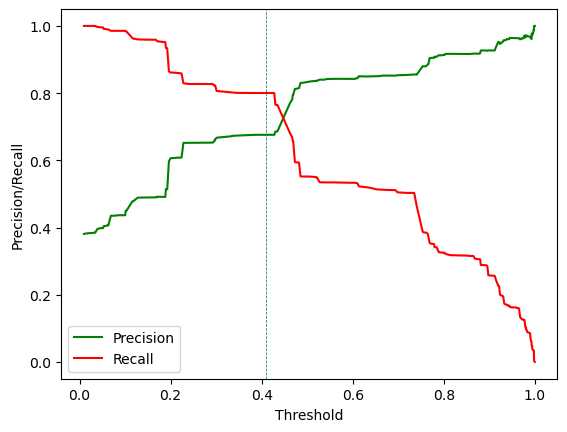

In [138]:
# plot precision-recall tradeoff curve

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels
plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

##### Here our probability threshold is 0.41 aprrox from above curve.

In [139]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [140]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,precision_recall_prediction
0,0,0.521458,1871,1,1,1,1,1,1,0,0,0,0,1,1
1,0,0.059337,6795,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.223881,3516,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.740036,8105,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.223881,3934,1,1,1,0,0,0,0,0,0,0,0,0


In [141]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)
print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3057  945]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3057
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  945
Model Accuracy                   :  0.7778
Model Sensitivity                :  0.8005
Model Specificity                :  0.7639
Model Precision                  :  0.6763
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.2361


************************************************** 



##### 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.409. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

In [142]:
# Lets add Lead Score feature to training dataframe
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.521458,1871,1,1,1,1,1,1,0,0,0,0,1,52
1,0,0.059337,6795,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.223881,3516,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.740036,8105,1,1,1,1,1,1,1,1,0,0,1,74
4,0,0.223881,3934,1,1,1,0,0,0,0,0,0,0,0,22


In [143]:
#Now we will focus on scaling dataset
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   object 
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   object 
 5   Lead Origin_Landing Page Submission       2772 non-null   bool   
 6   Lead Origin_Quick Add Form                2772 non-null   bool   
 7   Lead Source_Facebook                      2772 non-null   bool   
 8   Lead Source_Google                        2772 non-null   bool   
 9   Lead Source_Olark Chat                    2772 non-null   bool   
 10  Lead Source_Organic Search            

In [144]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0,0.964504,False,False,False,False,False,False,False,True,False,True,False
2376,0,-0.885371,False,False,True,False,False,False,False,True,False,True,False
7766,0,-0.777416,False,False,False,False,False,False,True,False,False,False,True
9199,0,-0.885371,False,True,False,False,False,True,False,False,False,True,False
4359,0,-0.885371,False,False,True,False,True,False,False,False,False,False,False


In [145]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [146]:
# Convert X_test_sm to integers
X_test_sm = X_test_sm.astype(int)

# Add constant value
X_test_sm = sm.add_constant(X_test_sm)

# Making prediction using model 3 (final model)
y_test_pred = logm3.predict(X_test_sm)

In [147]:
# top 10 columns
y_test_pred[:10]

4269    0.427729
2376    0.879613
7766    0.960144
9199    0.063049
4359    0.895429
9186    0.434415
1631    0.192434
8963    0.188233
8007    0.102776
5324    0.434415
dtype: float64

In [148]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.427729
2376,0.879613
7766,0.960144
9199,0.063049
4359,0.895429


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [150]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.427729
1,1,2376,0.879613
2,1,7766,0.960144
3,0,9199,0.063049
4,1,4359,0.895429


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.427729
1,2376,1,0.879613
2,7766,1,0.960144
3,9199,0,0.063049
4,4359,1,0.895429


In [152]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.427729,1
1,2376,1,0.879613,1
2,7766,1,0.960144,1
3,9199,0,0.063049,0
4,4359,1,0.895429,1


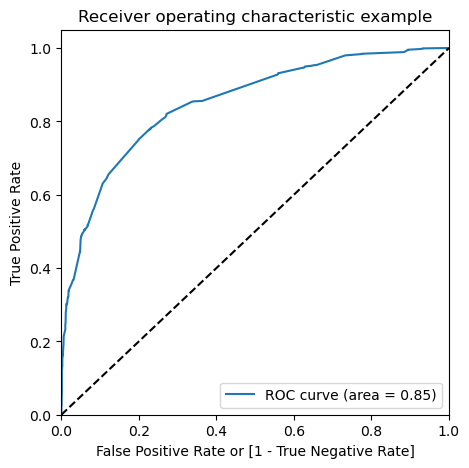

In [153]:
# Drawing ROC curve for Test Set
# Convert '0' and '1' strings to integers 0 and 1
y_true_int = y_pred_final["Converted"].astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_true_int, y_pred_final["Converted_Prob"], drop_intermediate=False)

# Draw ROC curve
draw_roc(y_true_int, y_pred_final["Converted_Prob"])

##### Area under ROC curve is 0.85 out of 1 which indicates a good predictive model

In [154]:
#Test set on model evaluation
# Convert 'Converted' column in y_train_pred_final to numeric type
y_train_pred_final['Converted'] = y_train_pred_final['Converted'].astype(int)

# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3057  945]
 [ 492 1974]] 

************************************************** 



In [155]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               4.826303
Current_occupation_Working Professional    2.728765
Lead Source_Reference                      2.289717
Last Activity_SMS Sent                     1.905573
Last Activity_Others                       1.322803
Total Time Spent on Website                1.313461
Lead Source_Others                         0.985524
Last Activity_Email Opened                 0.732709
Lead Source_Olark Chat                     0.226466
Last Activity_Olark Chat Conversation     -0.725088
const                                     -0.879891
Specialization_Hospitality Management     -1.027061
Do Not Email                              -1.152257
Lead Origin_Landing Page Submission       -1.292983
Specialization_Others                     -1.321526
dtype: float64

##### A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

In [156]:
# Lets add Lead Score 
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.427729,1,43
1,2376,1,0.879613,1,88
2,7766,1,0.960144,1,96
3,9199,0,0.063049,0,6
4,4359,1,0.895429,1,90


In [157]:
y_pred_final

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.427729,1,43
1,2376,1,0.879613,1,88
2,7766,1,0.960144,1,96
3,9199,0,0.063049,0,6
4,4359,1,0.895429,1,90
5,9186,1,0.434415,1,43
6,1631,1,0.192434,0,19
7,8963,1,0.188233,0,19
8,8007,0,0.102776,0,10
9,5324,1,0.434415,1,43


##### The customers with a higher lead score have a higher conversion chance 
##### The customers with a lower lead score have a lower conversion chance.